# TASK 1

### Determine normal or abnormal condition for all test data

Nello specifico, si procede all'addestramento di un modello Random Forest Classifier con le seguenti etichette:
- 0: normale
- 1: abnormal

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
#PATH = "/content/drive/MyDrive/Progetto Manutenzione"
PATH = "./"

In [3]:
# Caricare e concatenare i file CSV (Case001.csv-Case177.csv)
data_frames = []
for i in range(1, 178):
    file_path = (PATH + f'/dataset/train/data/Case{i:03d}.csv')
    df = pd.read_csv(file_path)
    df['Case'] = i
    data_frames.append(df)

data = pd.concat(data_frames, ignore_index=True)
data

,TIME,P1,P2,P3,P4,P5,P6,P7,Case
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...
212572,1.196,1.948734,1.912482,1.904362,1.835654,1.924899,1.857220,1.920020,177
212573,1.197,1.948823,1.899824,1.884360,1.825497,1.927513,1.846068,1.919081,177
212574,1.198,1.957784,1.911383,1.893740,1.859805,1.940953,1.861668,1.950562,177
212575,1.199,1.970451,1.950009,1.945417,1.913911,1.953648,1.835381,1.983321,177


In [4]:
column_names = ['Case', 'Spacecraft', 'Condition', 'SV1', 'SV2', 'SV3', 'SV4', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP7', 'BV1']
labels = pd.read_csv(PATH + '/dataset/train/labels.csv', names=column_names)

# Sostituisco "Normal" con 0, "Anomaly" e "Fault" con 1
labels['Condition'] = labels['Condition'].map({'Normal': 0, 'Anomaly': 1, 'Fault': 1})

# Sostituisco "No"/"Yes" con 0/1 nelle colonne da "BP1" a "BV1"
for col in ['BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP7', 'BV1']:
    labels[col] = labels[col].map({'No': 0, 'Yes': 1})

labels

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1
0,1,1,0,100,100,100,100,0,0,0,0,0,0,0,0
1,2,1,0,100,100,100,100,0,0,0,0,0,0,0,0
2,3,1,0,100,100,100,100,0,0,0,0,0,0,0,0
3,4,1,0,100,100,100,100,0,0,0,0,0,0,0,0
4,5,1,0,100,100,100,100,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,1,100,100,100,100,0,0,0,1,0,0,0,0
173,174,3,1,100,100,100,100,0,0,0,0,1,0,0,0
174,175,3,1,100,100,100,100,0,0,0,0,0,1,0,0
175,176,3,1,100,100,100,100,0,0,0,0,0,0,1,0


In [5]:
#Creazione dati di train
merged_data = pd.merge(data, labels, on="Case", how="left")

train_data = merged_data[["Case", "Condition", "P1", "P2", "P3", "P4", "P5", "P6", "P7"]]

train_data = pd.concat([train_data]*2, ignore_index=True)
train_data

#divisione in frame più piccolo, come 0.4 secondi (su un totale di 1.2)

#FFT su numpy

,Case,Condition,P1,P2,P3,P4,P5,P6,P7
0,1,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,1,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,1,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,1,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
4,1,0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...
425149,177,1,1.948734,1.912482,1.904362,1.835654,1.924899,1.857220,1.920020
425150,177,1,1.948823,1.899824,1.884360,1.825497,1.927513,1.846068,1.919081
425151,177,1,1.957784,1.911383,1.893740,1.859805,1.940953,1.861668,1.950562
425152,177,1,1.970451,1.950009,1.945417,1.913911,1.953648,1.835381,1.983321


In [7]:
features = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

X = train_data[features]
y = train_data["Condition"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model_name = "Random Forest"
model = RandomForestClassifier(
    max_depth = None,
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_estimators = 200,
    random_state=42)

print(f"Training {model_name}...")
model.fit(X_train, y_train)

print("DONE.")

Training RandomForest...
DONE.


In [14]:
result = []

print(f"Prediction on {model_name}...")
y_pred = model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)

print(f"Calculating result about {model_name}...")
model_result = {}

model_result["Model_name"] = model_name
model_result["Precision"] = precision
model_result["Recall"] = recall
model_result["F1_score"] = f1
model_result["Confusion_matrix"] = cm

result.append(model_result)

result

Prediction on RandomForest...
Calculating result about RandomForest...


[{'Model_name': 'RandomForest',
  'Precision': 0.99,
  'Recall': 0.97,
  'F1_score': 0.98,
  'Confusion_matrix': array([[50212,   170],
         [  968, 33681]])}]

## In locale, il notebook può essere eseguito da qui

In [26]:
#load del modello addestrato su Colab
import pickle
with open('trained_models/task1_RFmodel.pkl', 'rb') as file:
    model = pickle.load(file)
    
print(model)

RandomForestClassifier(random_state=42)


Creazione dati da classificare

In [27]:
# Caricare e concatenare i file CSV (Case178.csv-Case223.csv)
data_frames = []
for i in range(178, 223):
    file_path = (PATH + f'/dataset/test/data/Case{i:03d}.csv')
    df = pd.read_csv(file_path)
    df['Case'] = i
    data_frames.append(df)

prediction_data = pd.concat(data_frames, ignore_index=True)
prediction_data

,TIME,P1,P2,P3,P4,P5,P6,P7,Case
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,178
...,...,...,...,...,...,...,...,...,...
54040,1.196,2.999206,2.985047,2.982110,2.970652,3.004048,3.009258,3.006424,222
54041,1.197,2.977775,2.952302,2.945279,2.933262,2.965413,2.964095,2.962946,222
54042,1.198,2.959111,2.930013,2.915038,2.926461,2.932936,2.921135,2.922863,222
54043,1.199,2.948195,2.921907,2.911228,2.918398,2.910006,2.895828,2.893770,222


In [28]:
# Preparazione dei dati di test
features = prediction_data[["P1","P2","P3","P4","P5","P6","P7"]]
case_col = prediction_data[["Case"]]

# Predizione con il modello addestrato
predictions = model.predict(features)
features['Prediction'] = predictions

# Unione dei DataFrame
df_unique = pd.concat([case_col, features], axis=1)

# Calcolo della moda per ogni 'Case'
prediction_result = df_unique.groupby('Case')['Prediction'].apply(lambda x: x.mode().iat[0]).reset_index()

/var/folders/k7/8yszcg2s7nq1zy9gv8rzd3jc0000gn/T/ipykernel_63611/2374725696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Prediction'] = predictions


### Confronto delle predizioni del modello rispetto alle etichette reali

In [29]:
df1 = pd.read_csv('answer.csv')
df1 = df1[['ID', 'task1']]
df1.columns = ['Case', 'Real'] 

df2 = prediction_result

merged_df = pd.merge(df2, df1, on='Case', how='left')
merged_df.to_csv('./result/risultati_task1.csv', index=False)
merged_df

,Case,Prediction,Real
0,178,1,1
1,179,1,1
2,180,0,0
3,181,0,1
4,182,0,0
5,183,0,0
6,184,1,1
7,185,0,0
8,186,1,1
9,187,0,0


In [30]:
total_rows = len(merged_df)

wrong_predictions = merged_df[merged_df['Prediction'] != merged_df['Real']]
num_wrong = len(wrong_predictions)

percentage_wrong = (num_wrong / total_rows) * 100

print(f"Numero totale di righe: {total_rows}")
print(f"Numero di righe con predizioni errate: {num_wrong}")
print(f"Percentuale di dati sbagliati: {percentage_wrong:.2f}%")

Numero totale di righe: 45
Numero di righe con predizioni errate: 8
Percentuale di dati sbagliati: 17.78%


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura del file CSV
df = pd.read_csv('./result/risultati_task1.csv')


# Metriche
accuracy = accuracy_score(df['Real'], df['Prediction'])
precision = precision_score(df['Real'], df['Prediction'])
recall = recall_score(df['Real'], df['Prediction'])
f1 = f1_score(df['Real'], df['Prediction'])

print(f"Accuratezza: {accuracy:.2f}, Precisione: {precision:.2f}, Richiamo: {recall:.2f}, F1-Score: {f1:.2f}")


Accuratezza: 0.82, Precisione: 0.80, Richiamo: 0.92, F1-Score: 0.86


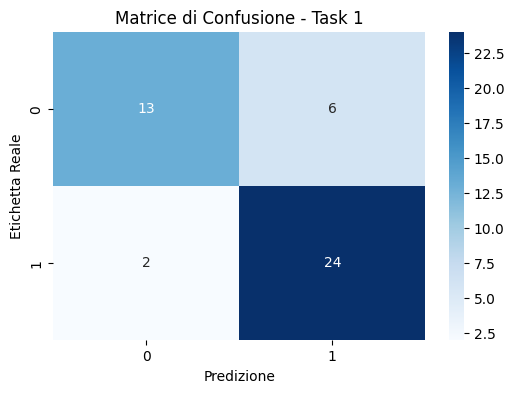

In [2]:
# Matrice di Confusione
cm = confusion_matrix(df['Real'], df['Prediction'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - Task 1')
plt.xlabel('Predizione')
plt.ylabel('Etichetta Reale')
plt.savefig('matrice_confusione_task1.png')
plt.show()


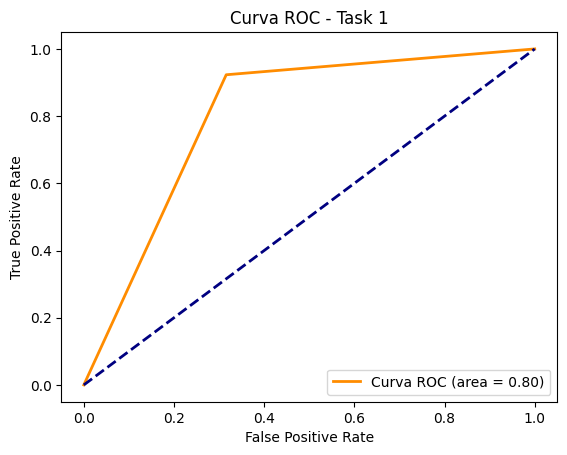

In [3]:
# Curva ROC
fpr, tpr, _ = roc_curve(df['Real'], df['Prediction'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Task 1')
plt.legend(loc="lower right")
plt.savefig('roc_curve_task1.png')
plt.show()
